# AP Homework (Week 4)

**FBA Quant 이의형**

---

# [Summary]  

**Investment Science \- David, G. Luenberger**  

## Chapter 6. MEAN - VARIANCE PROTFOLIO THEORY

### 6-1. 자산수익  

수익 = 회수금액 / 투자금액  
수익률 = 수익 + 1  
이는 공매에도 똑같이 적용됨. (투자금액이 음수, 회수금액도 음수)  
여러 자산을 가지고 있을 경우, 그 해당 자산의 수익률에 가중치를 곱해서 계산

### 6-2. 확률변수

기댓값: 확률에 대한 평균  
분산: $E[(확률변수 - 확률변수의\ 평균)^2]$  
표준편차: $\sqrt{분산}$  
공분산: $E[(확률변수1 - 확률변수1의\ 평균) * (확률변수2 - 확률변수2의\ 평균)]$의   
공분산 유계: 공분산의 절대값은 각 확률변수의 표준편차를 곱한 것보다 항상 작거나 같다.  
상관계수: $ \frac {공분산} {각\ 확률변수\ 표준편차의\ 곱}$  
합의 분산: (확률변수1 + 확률변수2)의 분산은 확률변수1의 분산 + 2의 분산 + 2 * 공분산  
두 개 변수가 상관관계가 없는 경우, 공분산은 0이 되므로 각 분산의 합  


### 6-3. 불확실한 수익

투자 또한 불확실한 확률변수  
다른 자산과의 공분산 고려 필요

### 6-4. 포트폴리오 평균과 분산

포트폴리오 평균 수익률: 각 자산의 기대수익률 * 각 자산의 가중치  
포트폴리오 수익률의 분산: $w_i * w_j * cov(x_i,x_j)$  
포트폴리오 도표: 공분산에 의해 곡선이 결정  

### 6-5. 가능 해 집합

가능 해 영역은 왼쪽으로 볼록  
최소분산 집합: 왼쪽 경계선  
최소분산 점(minimun-varianve point, MVP): 최소 분산을 갖는 점  
efficient frontier: 최소분산 집합 위에 해당하는 부분  

### 6-6. Markowitz 모형


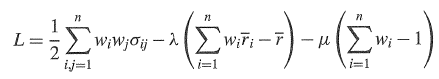

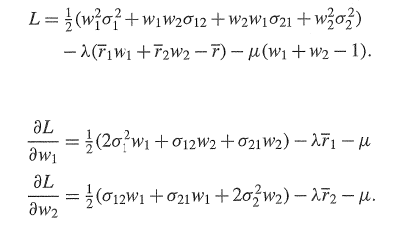

### 6-7. 무위험 자산의 포함
무위험 자산을 포함시키면 가능영역에 선분들이 추가  
무위험 이자율로 돈을 빌리거나 빌려줄 수 있는 경우: 무한 크기의 삼각형  
빌려주는 것만 가능한 경우: 앞부분 삼각형  

### 6-8. 유일 펀드 정리

위험 자산들로 구성된 펀드와 무위험 자산의 조합으로 효율적 포트폴리오를 만들 수 있다.

---

# [Problem Making]

## Problem

세 가지 자산(주식, 채권, 리츠)에 투자하는 포트폴리오를 고려해보자.  

세 자산의 기대 수익률과 표준편차는 다음과 같다.  

주식: 기대수익률 12%, 표준편차 25%  
채권: 기대수익률 5%, 표준편차 10%  
리츠: 기대수익률 8%, 표준편차 15%  

세 자산에 대한 상관관계는 다음과 같다.  
　  

<div style="margin-left: -750px;">
    
|  |주식|채권|리츠|
| :---: | :---: | :---: | :---: | 
|주식|1.00|0.10|0.30|
|채권|0.10|1.00|0.20|
|리츠|0.30|0.20|1.00|
    
</div>
  
포트폴리오에서 9%의 수익을 기대할 때, 최소 분산을 구하시오.  

## Solution

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 문제 정보 입력
rtn = np.array([0.12, 0.05, 0.08])
sigma = np.array([0.25, 0.1, 0.15])
corr_m = np.array([[1.0, 0.1, 0.3],
                    [0.1, 1.0, 0.2],
                    [0.3, 0.2, 1.0]])

# 공분산 생성
cov_m = sigma.reshape(3,1).dot(sigma.reshape(1,3)) * corr_m

# 목적합수
def obj_function(w):
    return w.dot(cov_m).dot(w)

# 설정
n = 3
target = 0.09
w_init = np.ones(n) / n

# 제약조건
c_ = [{'type':'eq', 'fun': lambda w: sum(w)-1. },       
      {'type':'eq', 'fun': lambda w: rtn.dot(w)-target}]
b_ = [(0,1) for i in range(n)]

# 최적화
res = minimize(obj_function, w_init, constraints=c_, bounds = b_)

# 출력
print(f'자산 비율: 주식 {res.x[0]:.1%}, 채권 {res.x[1]:.1%}, 리츠 {res.x[2]:.1%}')
print(f'최소 분산: {res.fun:.4f})')

자산 비율: 주식 38.0%, 채권 17.4%, 리츠 44.6%
최소 분산: 0.0184)


---

# [Problem Solving]

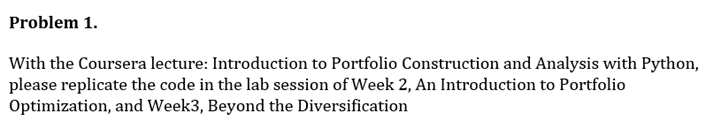

### 2주차 Section 1. Introduction to Optimization and The Efficient Frontier

#### 1. Efficient Frontier Part I

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [7]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [5]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
ind['Food '].shape

(1110,)

In [7]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [8]:
ind.shape

(1110, 30)

In [9]:
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


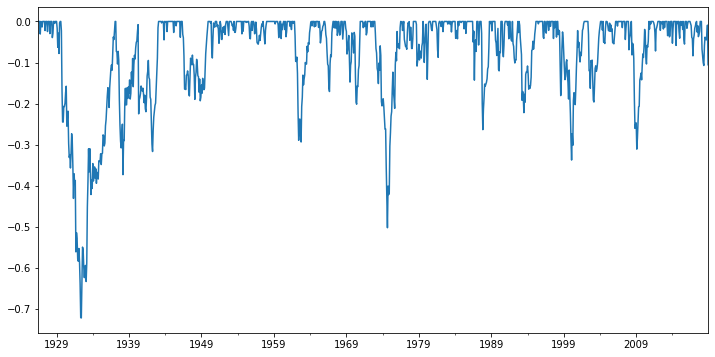

In [10]:
erk.drawdown(ind['Food'])['Drawdown'].plot(figsize=(12,6));

In [11]:
cols_interest = ['Food','Smoke','Coal','Beer','Fin']
erk.var_gaussian(ind[cols_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [12]:
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [13]:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

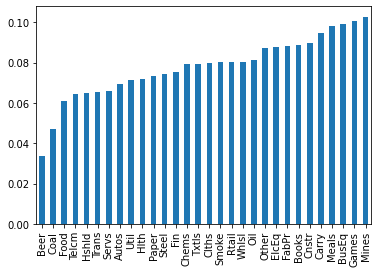

In [14]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar();

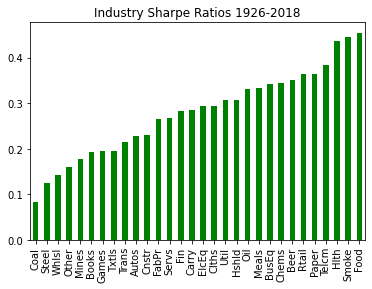

In [15]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", color='green');

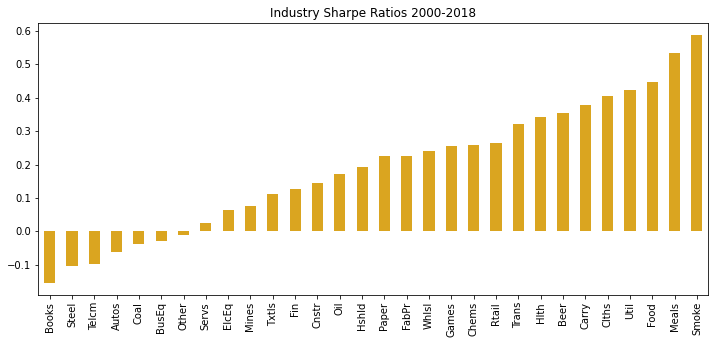

In [16]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios 2000-2018', 
                                                                figsize = (12,5), color='goldenrod');

In [17]:
er = erk.annualize_rets(ind["1995":"2000"], 12)

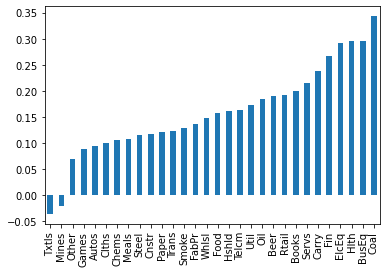

In [18]:
er.sort_values().plot.bar();

In [19]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [20]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


#### 2. Efficient Frontier Part II

In [21]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [22]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [23]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [24]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [25]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [26]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [27]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [28]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.05505919577643704

In [29]:
# Asset Frontier
l = ['Games','Fin']

In [30]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [31]:
type(weights), l

(list, ['Games', 'Fin'])

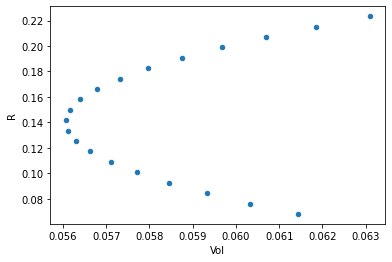

In [32]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R");

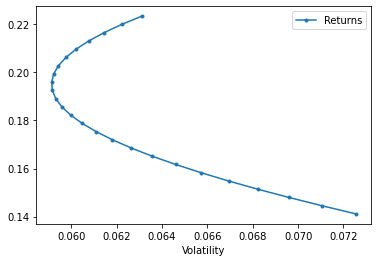

In [33]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l]);

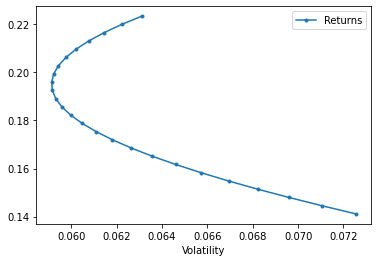

In [34]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l], style = '.');

#### 3. Applying Quadprog to Draw the Efficient Frontier

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def plot_ef(n_points, er, cov, style='.-'):
    """
    Plots the multi-asset efficient frontier
    """
    weights = minimize_vol(target_return)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=style)

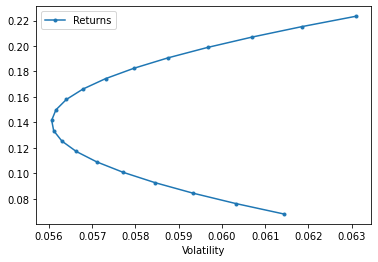

In [37]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l]);

In [38]:
from scipy.optimize import minimize
import numpy as np

def target_is_met(w,er):
    return target_return - erk.portfolio_return(w, er)

def minimize_vol(target_return, er, cov):
    """
    target_ret => w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights,er)  
    }  
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess, # 모듈로 넣을땐 erk 제거
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return results.x

In [39]:
l

['Games', 'Fin']

In [40]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
vol15

0.056163669406706564

In [41]:
w15

array([0.47287631, 0.52712369])

In [42]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

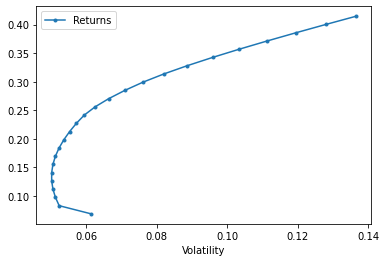

In [43]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l]);

### 2주차 Section 2. Implementing Markowitz

#### 1. Locating the Max Sharpe Ratio Portfolio

In [44]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np

def msr(riskfree_rate, er, cov):
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n 
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weighs
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol

    results = minimize( neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x

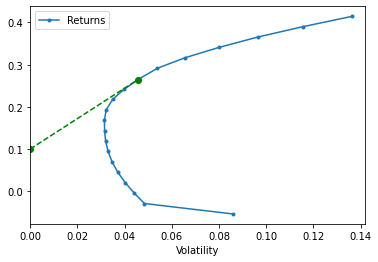

In [45]:
ax = plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed');

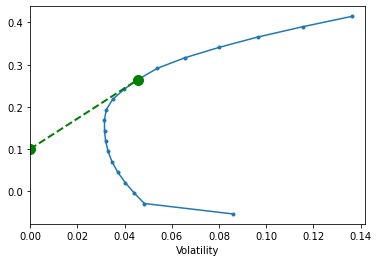

In [46]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1)

#### 2. Plotting EW and GMV on the Efficient Frontier

In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from nb import edhec_risk_kit_129 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
l = ["Food", "Steel"]
erk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

In [49]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [50]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [51]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [52]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

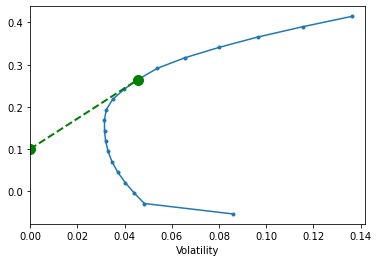

In [53]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

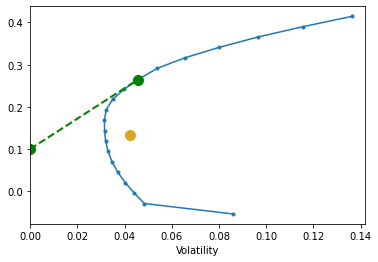

In [54]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew = True)

<AxesSubplot:xlabel='Volatility'>

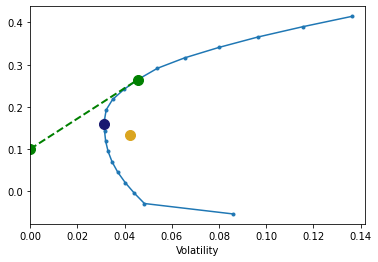

In [55]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew = True, show_gmv = True)

### 3주차 Section 1.  Beyond Diversification 1

#### 1. Limits of Diversification Part1

In [56]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
ind_return.shape, ind_nfirms.shape, ind_size.shape

((1110, 30), (1110, 30), (1110, 30))

In [58]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-08,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-09,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-10,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-11,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0


In [59]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

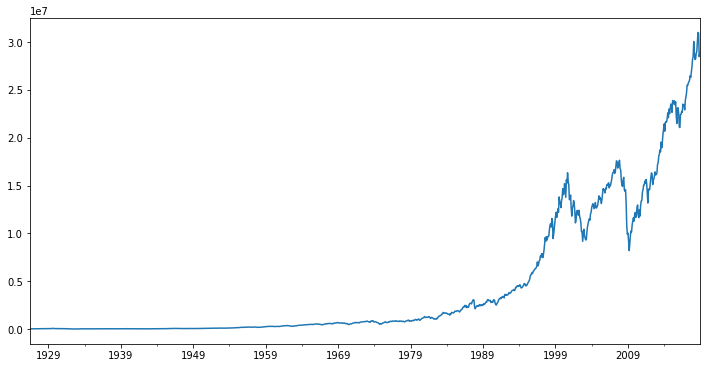

In [60]:
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.plot(figsize=(12,6));

In [61]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [62]:
ind_capweight.loc['1926'].sum(axis = 'columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

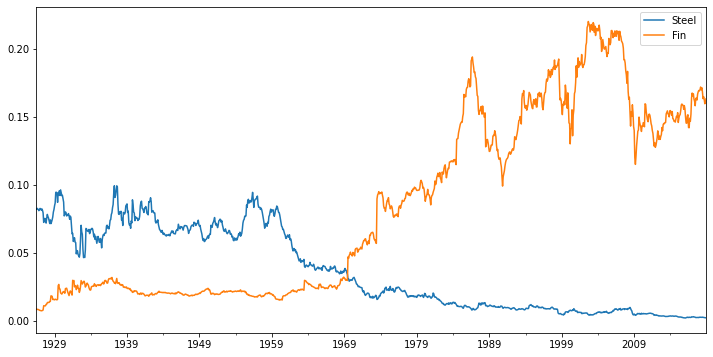

In [63]:
ind_capweight[["Steel", "Fin"]].plot(figsize=(12,6));

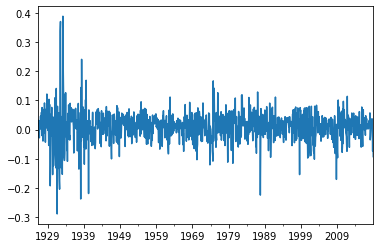

In [64]:
# Constructing a Cap Weighted Market Index
total_market_return = (ind_capweight * ind_return).sum(axis="columns")
total_market_return.plot();

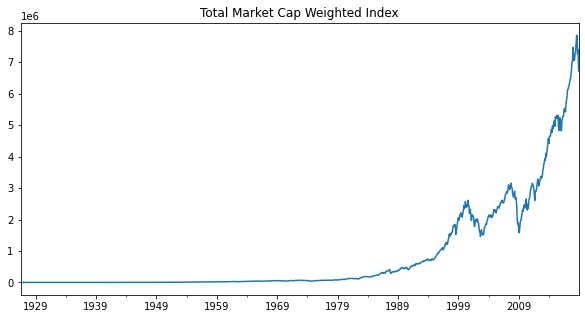

In [65]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize = (10,5), title = "Total Market Cap Weighted Index");

#### 2. Limits of Diversification Part2

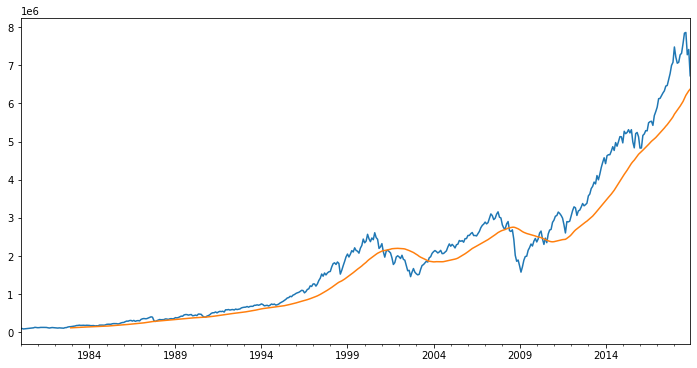

In [66]:
# Rolling Windows 
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot();

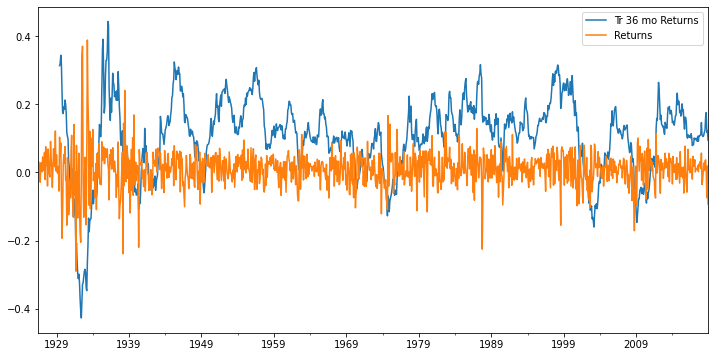

In [67]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label="Tr 36 mo Returns", legend=True)
total_market_return.plot(label="Returns", legend=True);

In [68]:
# Rolling Correlations - along with MultiIndexes and .groupby
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [69]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [70]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

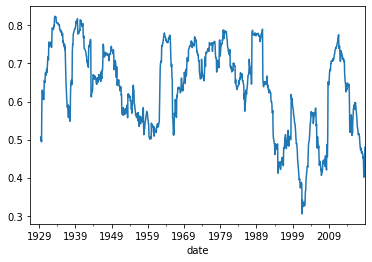

In [71]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot();

<AxesSubplot:xlabel='date'>

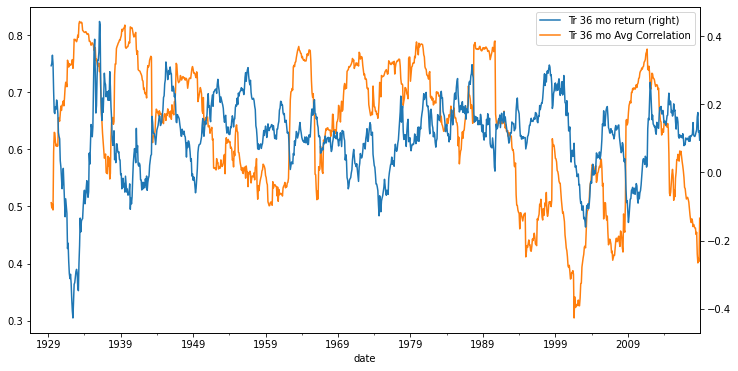

In [72]:
tmi_tr36rets.plot(label="Tr 36 mo return", figsize=(12,6), legend=True, secondary_y=True)
ind_tr36corr.plot(legend=True, label="Tr 36 mo Avg Correlation")

In [73]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884015

시장이 무너지면 상관관계가 올라가서 분산투자가 소용이 없게 된다.

#### 3. CPPI and Drawdown Constraints Part1

1. Compute the cushion: asset value - floor
2. Compute the allocation: m * risk_budget
3. Compute the new asset value

In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

# Load the industry returns and the total market index we previously created
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]
safe_r = pd.DataFrame().reindex_like(risky_r)

safe_r.values[:] = 0.03/12  # 안전자산 이자율 / 12개월
start = 1000
floor = 0.80  # - 20%

---

In [76]:
# An Aside on Efficiency

def compound1(r):
    return np.expm1(np.log1p(r).sum())

def compound2(r):
    return (r+1).prod()-1

compound1(ind_return[["Steel", "Fin", "Beer"]])

Steel      435.580153
Fin       5778.433650
Beer     35820.527452
dtype: float64

In [77]:
compound2(ind_return[["Steel", "Fin", "Beer"]])

Steel      435.580153
Fin       5778.433650
Beer     35820.527452
dtype: float64

In [78]:
%timeit compound1(ind_return)

1.89 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
%timeit compound2(ind_return)

1.28 ms ± 98.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


---

In [80]:
# Back to CPPI

dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

In [81]:
for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w

    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

#### 4. CPPI and Drawdown Constraints Part2

In [82]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


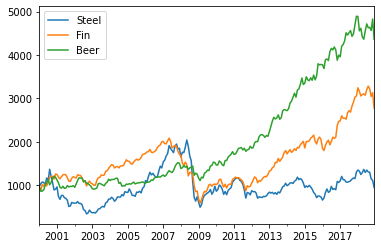

In [83]:
risky_wealth = start*(1+risky_r).cumprod()
risky_wealth.plot();

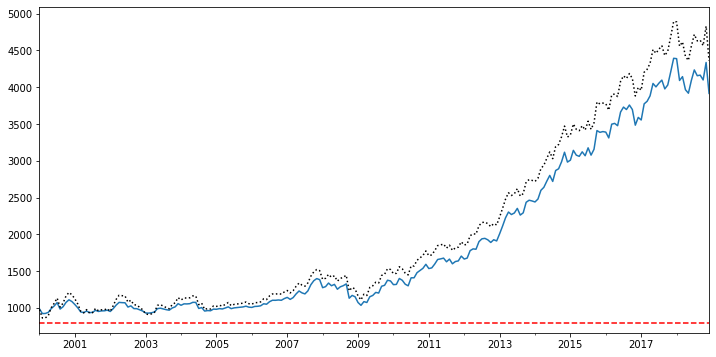

In [84]:
ax = account_history['Beer'].plot(figsize=(12,6))
risky_wealth['Beer'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--');

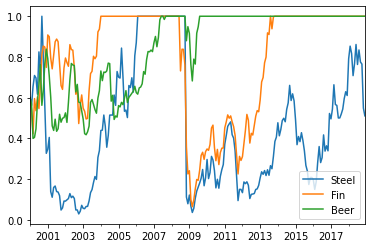

In [85]:
risky_w_history.plot();

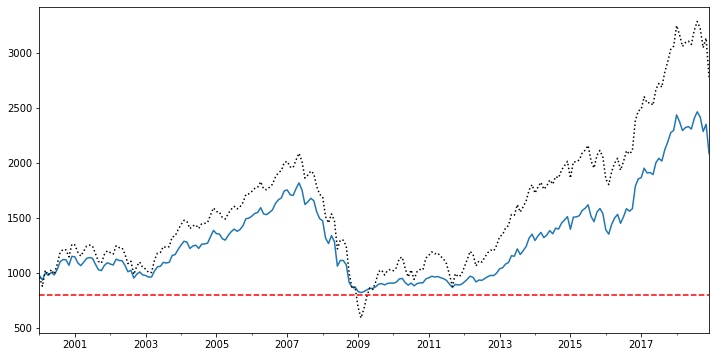

In [86]:
ax = account_history['Fin'].plot(figsize=(12,6))
risky_wealth['Fin'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--');

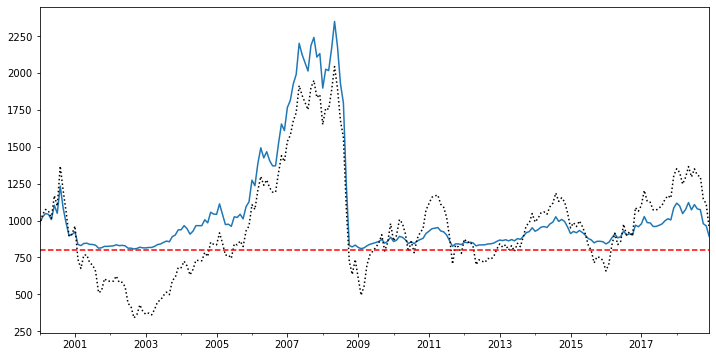

In [87]:
ax = account_history['Steel'].plot(figsize=(12,6))
risky_wealth['Steel'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--');

In [88]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [89]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


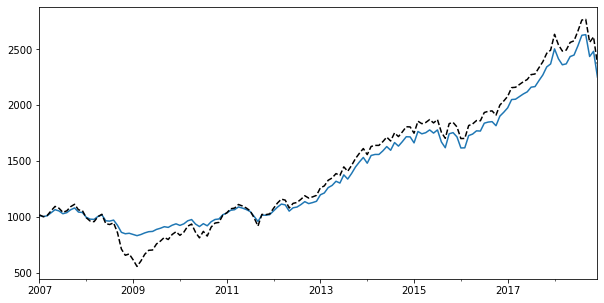

In [90]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(legend=False, figsize=(10, 5))
btr["Risky Wealth"].plot(ax = ax, style="k--", legend=False);

In [91]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [92]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


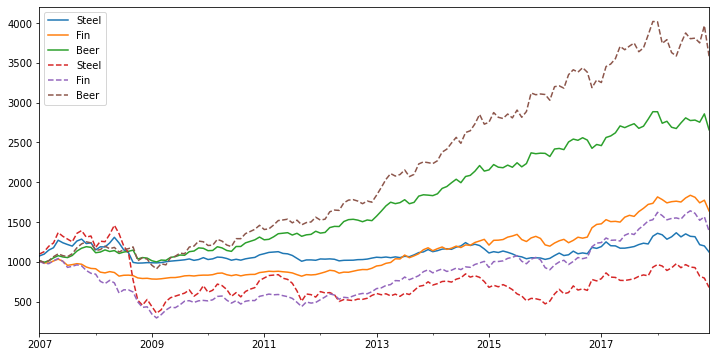

In [93]:
# Drawdown Constraint
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)
ax = btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax, style="--");
# ax.axhline(y = 1000 - (1000*0.25), color = 'r', linestyle = '-.');

In [94]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [95]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186


### 3주차 Section 2.  Beyond Diversification 2

#### 1. Random Walks and Monte Carlo

In [96]:
import numpy as np
import pandas as pd

def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0*(1+rets).cumprod()
    return prices

In [97]:
p = gbm(10, n_scenarios=3)
p.shape

(120, 3)

In [98]:
p.head()

,0,1,2
0,102.899436,104.876628,97.122174
1,105.877786,107.484947,100.851250
2,99.902249,103.761197,97.171651
3,105.263382,107.621284,98.988149
4,107.328229,115.745960,98.888914


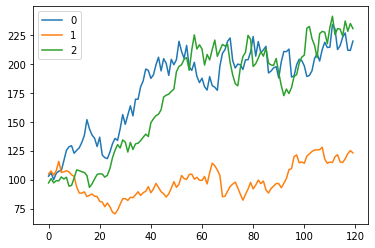

In [99]:
p.plot();

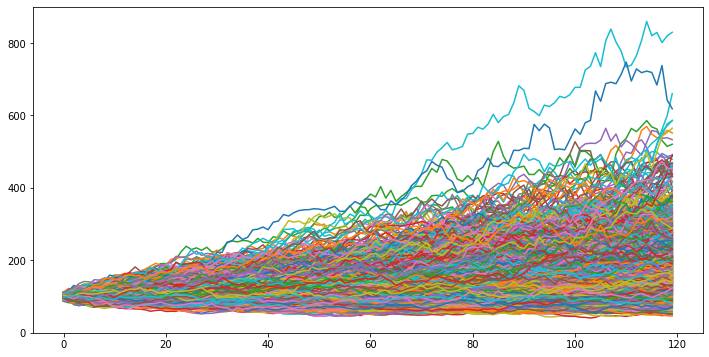

In [100]:
gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False);

In [101]:
def gbm1(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [102]:
%timeit gbm1(n_years=5, n_scenarios=1000)

3.56 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [103]:
%timeit gbm(n_years=5, n_scenarios=1000)

4.19 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


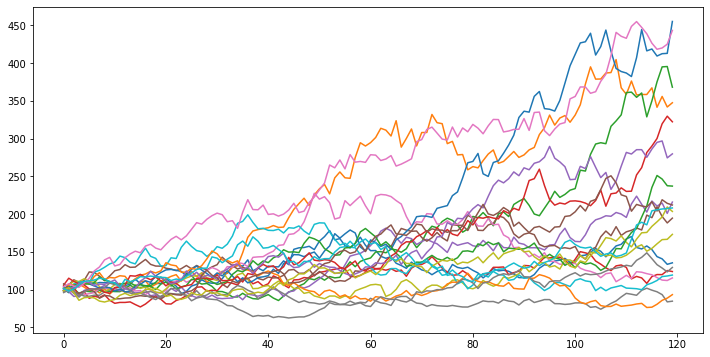

In [104]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6));

In [105]:
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

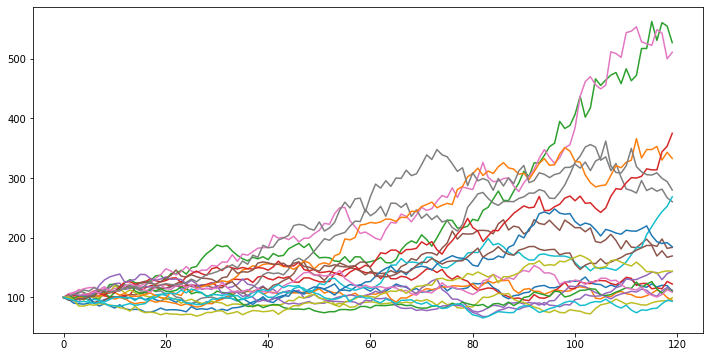

In [106]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6));

In [107]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,95.450121,97.673124,96.001821,102.905267,102.211438,101.648519,103.389151,100.616936,105.475552,98.773874
2,93.410039,99.826096,98.277333,102.851977,104.271812,101.440920,97.136467,102.975563,115.186717,96.436468
3,91.964123,103.155919,106.129527,106.944639,95.415223,101.716417,88.632097,103.331520,117.357647,95.210061
4,90.793792,103.125027,110.194201,112.109322,95.306409,102.584756,77.325116,105.791477,117.585422,104.775849


#### 2. Installing IPYWIDGETS

In [108]:
import ipywidgets as widgets

def squareit(n):
    return n*n

In [109]:
squareit(5)

25

In [110]:
widgets.interact(squareit, n = (0,100));

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

#### 3. interactive plots of monte Carlo Simulations of CPPI and GBM Part1

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [2]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=100, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)

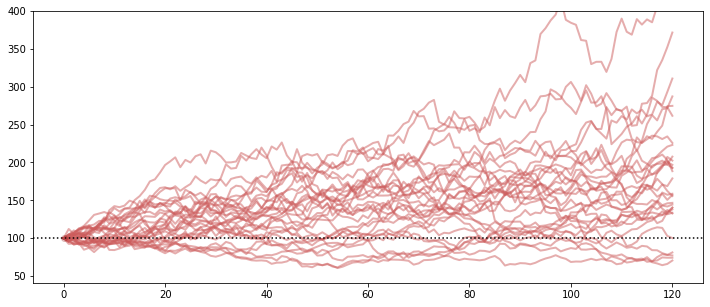

In [3]:
show_gbm(30, 0.07, 0.15)

In [4]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios=(1,20,5), 
                                   mu=(-0.2, 0.2, 0.01),
                                   sigma=(0, 0.3, 0.01)
                                   )

In [5]:
display(gbm_controls)

interactive(children=(IntSlider(value=6, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value=…

In [116]:
# Interactive CPPI Simulation - Monte Carlo

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)

display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

#### 4. interactive plots of monte Carlo Simulations of CPPI and GBM Part2

In [117]:
import matplotlib.pyplot as plt

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    wealth_ax.set_xlim(0,120)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

---

##  

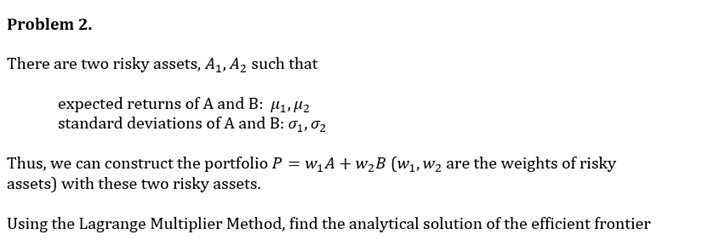

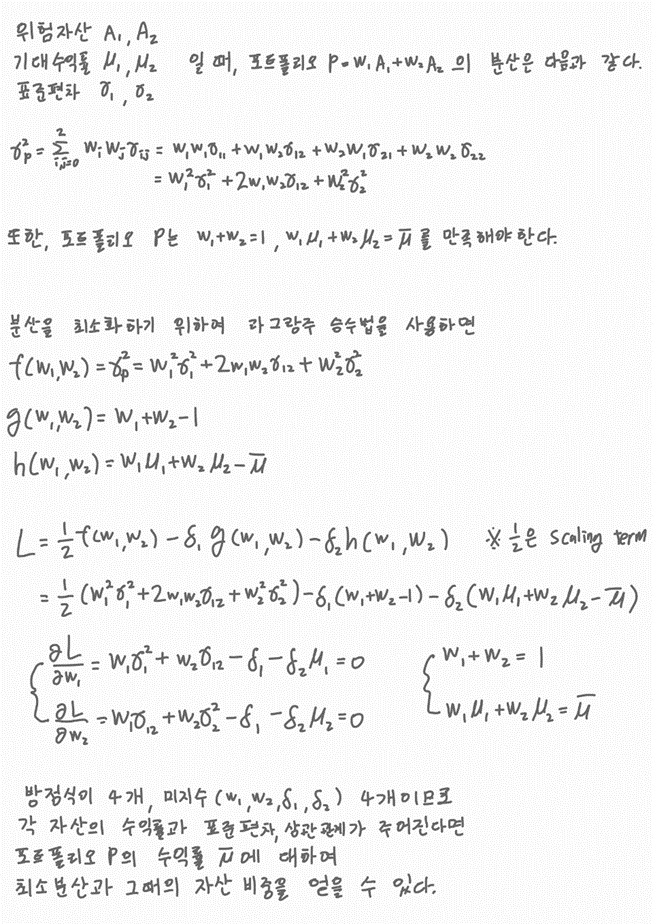

---

##  

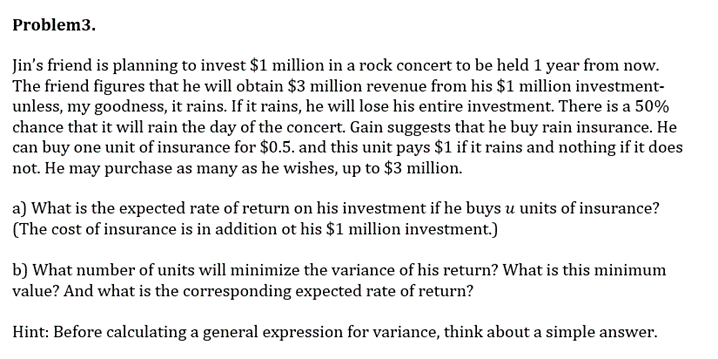

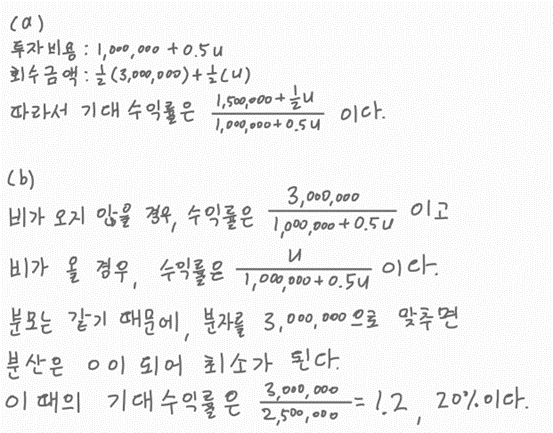

---